In [1]:
from PyBayesAB import bernoulli, poisson, normal, multinomial
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Composite model

Bayesian metrics summary: 

Probablity that A is better than B = 8.33% 

There is 95% that the difference in Composite Parameter is between -1.42 and 0.40 

The MAP (maximum a posterior estimate) if -0.69 

Probability that the difference is within the ROPE (region of practical equivalence) is 100.0% 

ROPE-based decision: No difference between A and B -> Practically Significant  

Bayes factor (A vs B vs null): 

                For the null hypothesis: Parameter between -5.00 and 5.00
                For the alternative hypothesis: Parameter larger than 0 or smaller than 0
                The Bayes factor is 9166666666.67, thus providing decisive/extreme evidence for the alternative
                




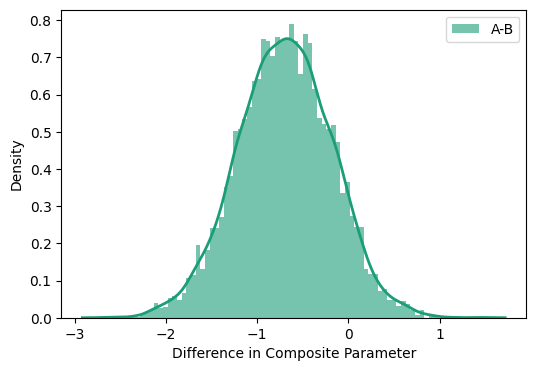

In [2]:
n_exp = 20

bernoulli_model = bernoulli.BaysBernoulli()
p_A = 0.21
p_B = 0.2
for n in range(n_exp):
    n_trial = np.random.randint(10,50)
    bernoulli_model.add_rand_experiment(n_trial, p_A, group="A")
    bernoulli_model.add_rand_experiment(n_trial, p_B, group="B")

normal_model = normal.BaysNorm()
mu_A = 20
std_A = 10
tau_A = 1/std_A**2 
mu_B = 22
std_B = 12
tau_B = 1/std_B**2
for i in range(n_exp):
    n_data = np.random.randint(10,50)
    normal_model.add_rand_experiment(n_data, mu_A, std_A, group="A")
    normal_model.add_rand_experiment(n_data, mu_B, std_B, group="B")


# create a composite model
composite_model = bernoulli_model * normal_model

# plot the final posterior for the composite model
fig = composite_model.plot_final_posterior()

# get Bayesian statistics for the composite model
stats = composite_model.summary_result(rope_interval=[-5,  5])
print(stats)

(<Figure size 1000x600 with 1 Axes>, <Figure size 1000x600 with 1 Axes>)

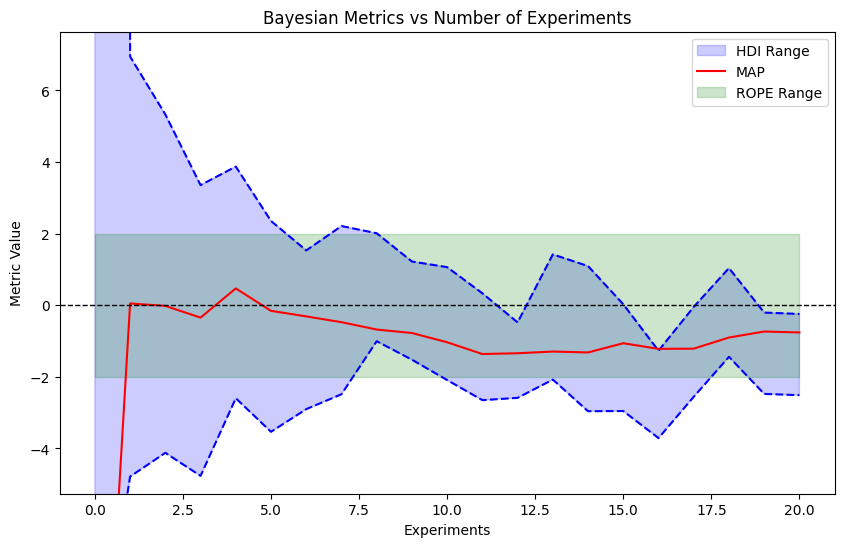

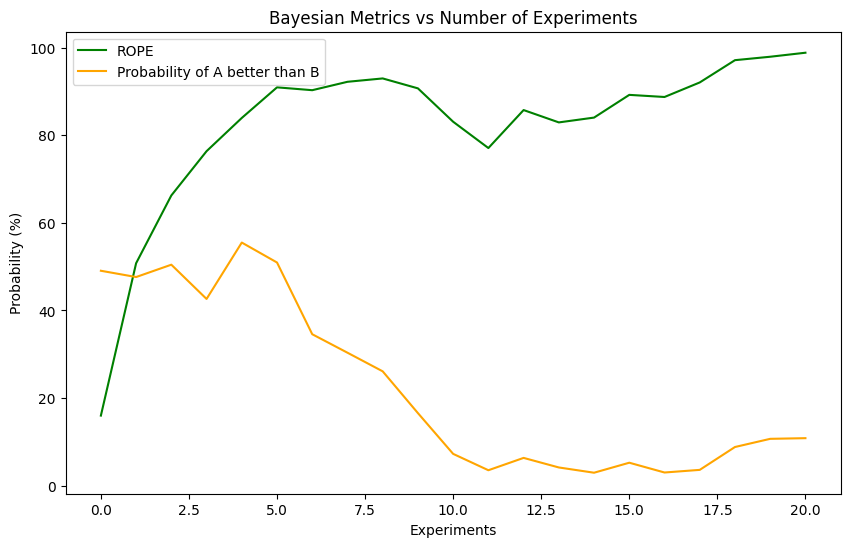

In [3]:
composite_model.plot_bayesian_metrics(rope_interval=[-2, 2])

# Bernoulli 

In [4]:

# Create data type = Bernoulli object
Bern_test = bernoulli.BaysBernoulli()

# create data for two groups
p_A = 0.21
p_B = 0.2
for n in range(20):
    n_trial = np.random.randint(10,50)
    Bern_test.add_rand_experiment(n_trial, p_A, group="A")
    Bern_test.add_rand_experiment(n_trial, p_B, group="B")


Bayesian metrics summary: 

Probablity that A is better than B = 93.28% 

There is 95% that the difference in Bernoulli probability is between -0.01 and 0.06 

The MAP (maximum a posterior estimate) if 0.04 

Probability that the difference is within the ROPE (region of practical equivalence) is 11.5% 

ROPE-based decision: Inconclusive: needs more data  

Bayes factor (A vs B vs null): 

                For the null hypothesis: Parameter between -0.01 and 0.01
                For the alternative hypothesis: Parameter larger than 0 or smaller than 0
                The Bayes factor is 1.05, thus providing anecdotal evidence for the alternative
                




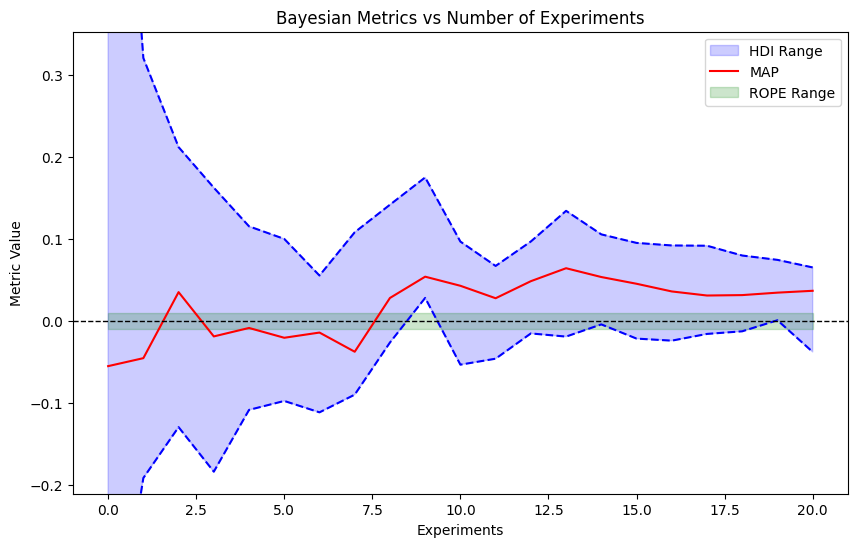

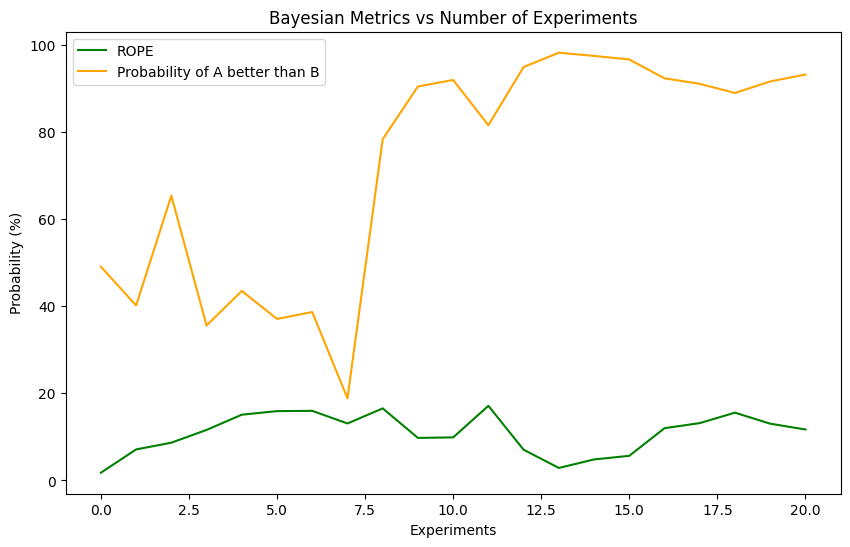

In [5]:
# calculate some Bayesian metrics

ROPE = [-0.01, 0.01]  # Region of Practical Equivalence

print(Bern_test.summary_result(rope_interval=ROPE,level=95))

_, _ = Bern_test.plot_bayesian_metrics(rope_interval=ROPE)

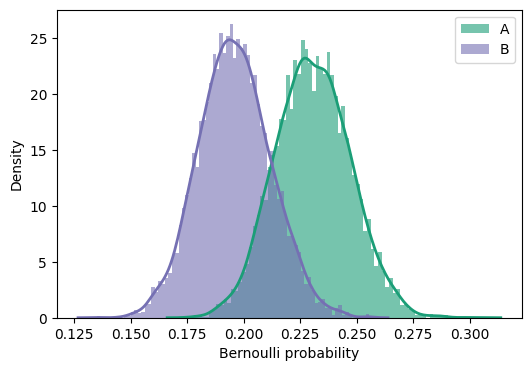

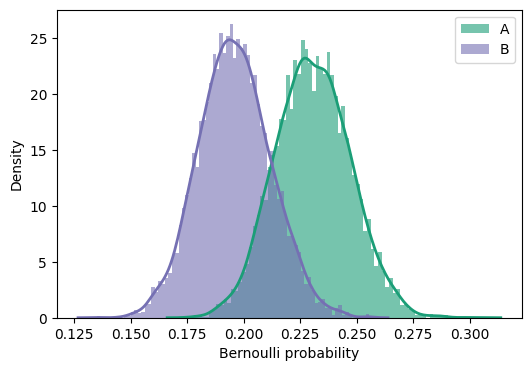

In [6]:
# plot posterior of the difference in p
Bern_test.plot_final_posterior(group="AB")

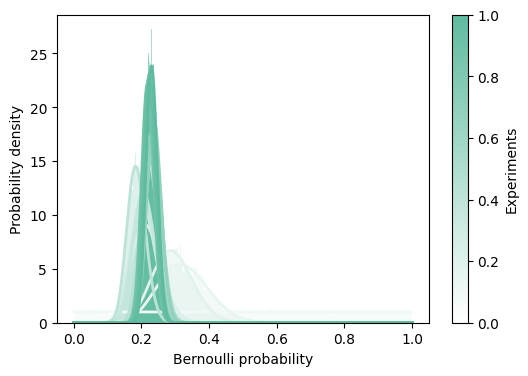

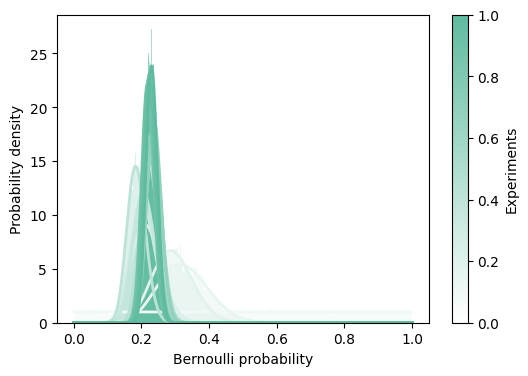

In [7]:
# plot cumulative (updated) posterior of the difference in p
Bern_test.plot_cum_posterior(group="A", type="1D")

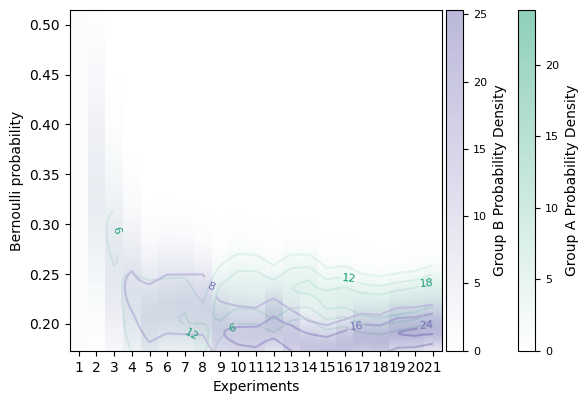

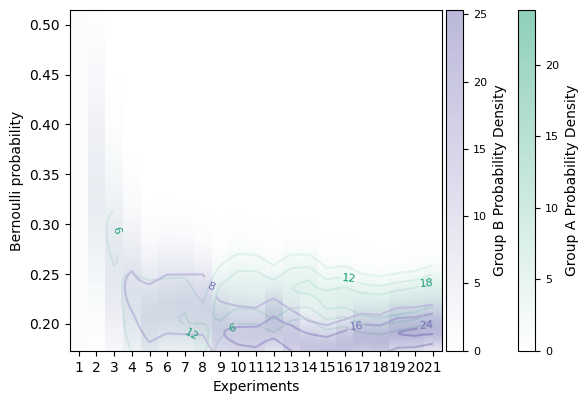

In [8]:
# Plot cumulative (updated) posterior for both groups as heatmap
Bern_test.plot_cum_posterior(group="AB", type="2D")

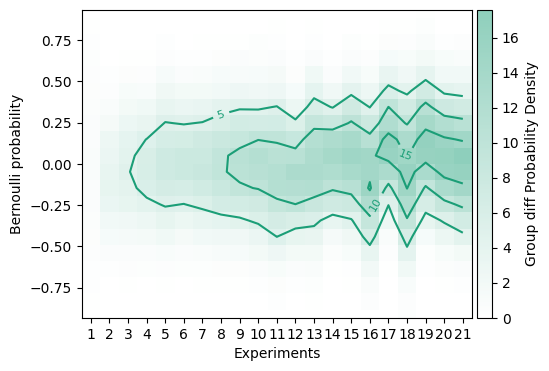

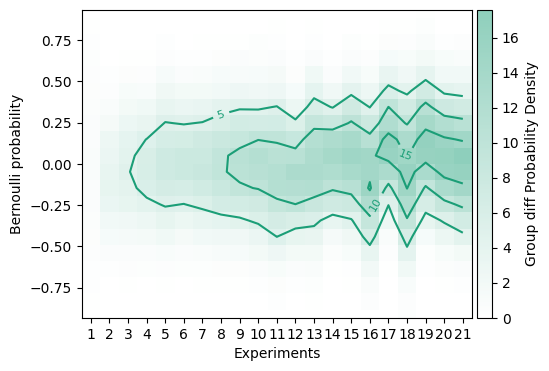

In [9]:
# Plot cumulative (updated) posterior for the difference as heatmap
Bern_test.plot_cum_posterior(group="diff", type="2D")

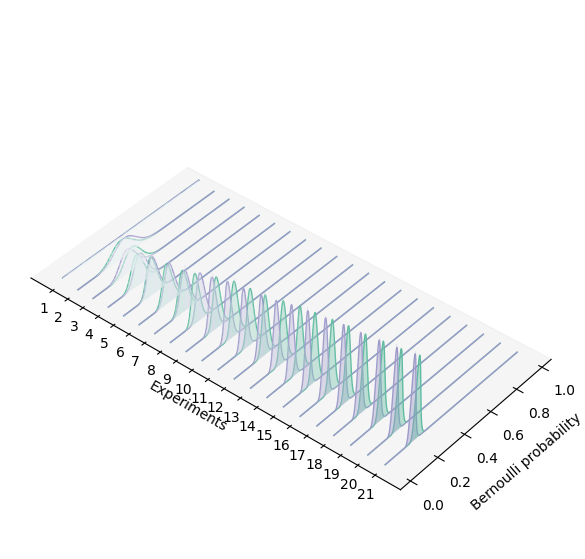

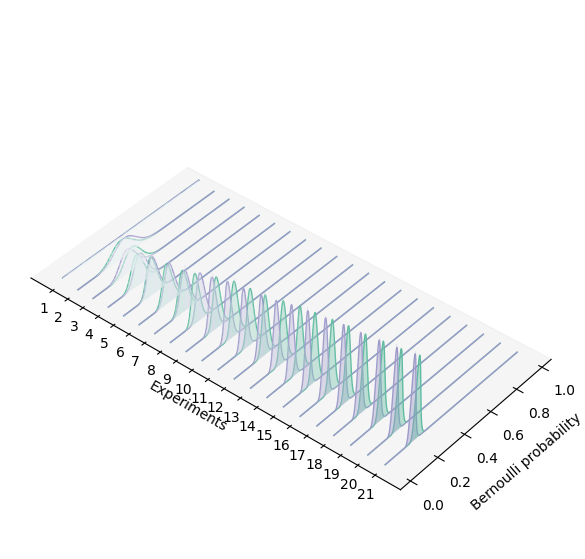

In [10]:
Bern_test.plot_cum_posterior(group="AB", type="3D")

In [11]:
# Plot animation for both groups
anim = Bern_test.plot_anim(group="AB")
anim

# Poisson

In [12]:
from PyBayesAB.distribution import poisson

# Create Likelihhod = Poisson object
Pois_test = poisson.BaysPoisson()

# create data
mu_A = 20
mu_B = 21
n_exp = 20
for next in range(n_exp):
    n_events = np.random.randint(5, 10)
    # add random experiment for group A and B
    Pois_test.add_rand_experiment(n_events, mu_A)
    Pois_test.add_rand_experiment(n_events, mu_B, group="B")

Bayesian metrics summary: 

Probablity that A is better than B = 5.12% 

There is 95% that the difference in Poisson mean is between -1.58 and 0.47 

The MAP (maximum a posterior estimate) if -0.88 

Probability that the difference is within the ROPE (region of practical equivalence) is 98.1% 

ROPE-based decision: No difference between A and B -> Practically Significant  

Bayes factor (A vs B vs null): 

                For the null hypothesis: Parameter between -2.00 and 2.00
                For the alternative hypothesis: Parameter larger than 0 or smaller than 0
                The Bayes factor is 49.50, thus providing very strong evidence for the alternative
                




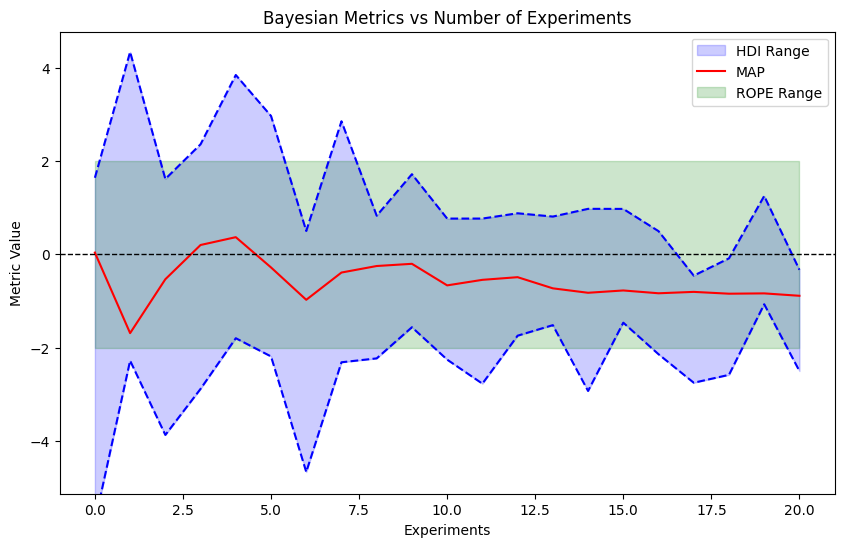

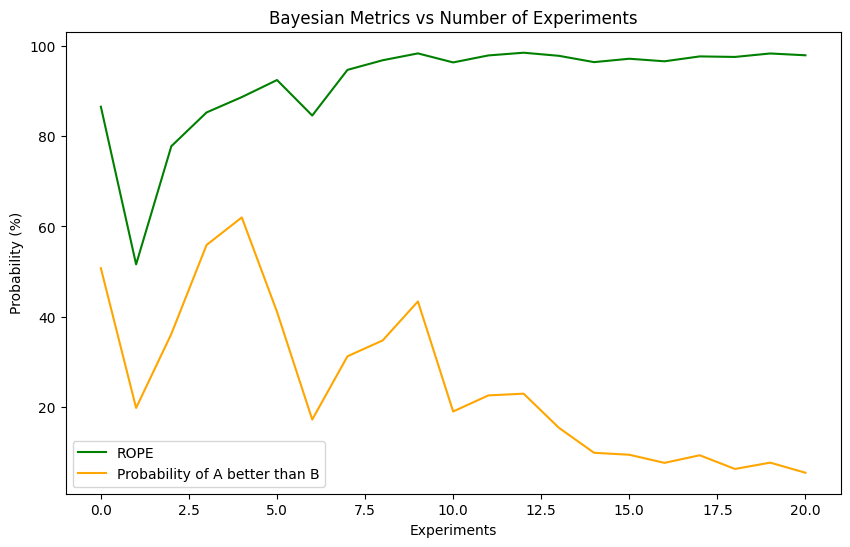

In [13]:
# calculate some Bayesian metrics

ROPE = [-2, 2]  # Region of Practical Equivalence

print(Pois_test.summary_result(rope_interval=ROPE,level=95))

_, _ = Pois_test.plot_bayesian_metrics(rope_interval=ROPE)

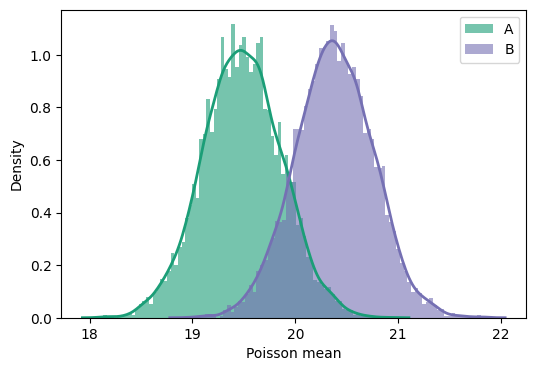

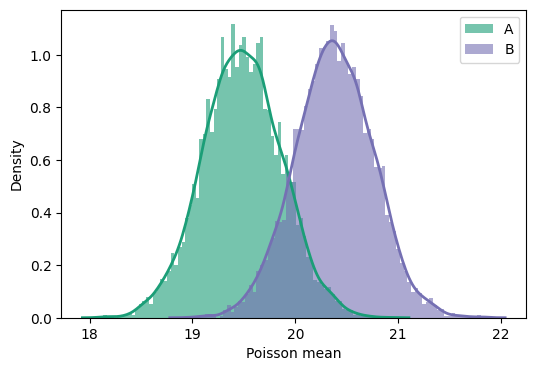

In [14]:
# Final posterior difference in Poisson mean
Pois_test.plot_final_posterior(group="AB")


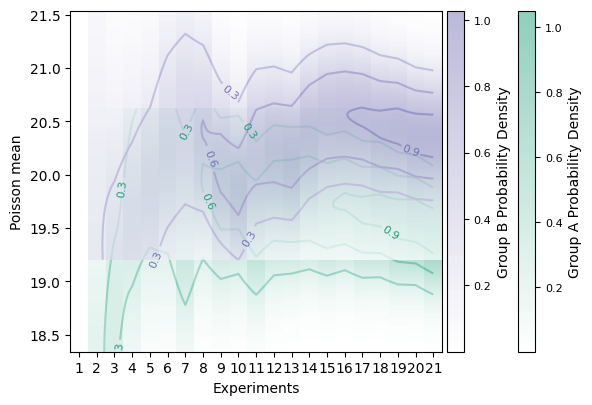

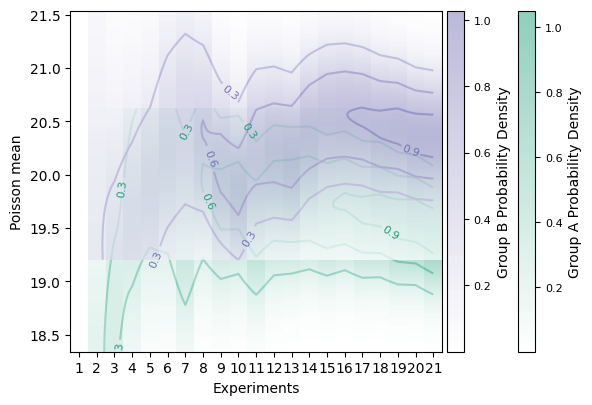

In [15]:
Pois_test.plot_cum_posterior(group="AB", type="2D")


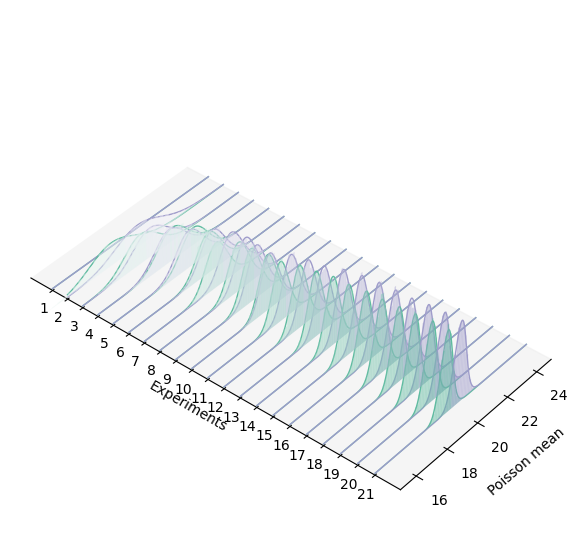

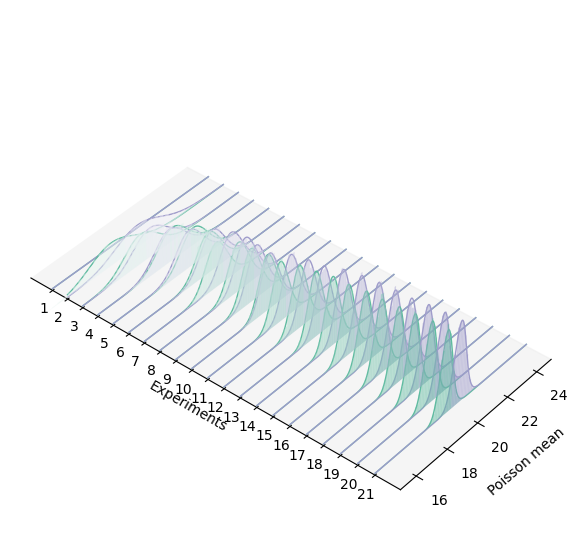

In [16]:
Pois_test.plot_cum_posterior(group="AB", type="3D", para_range=[15, 25])

In [17]:
# animation
anim = Pois_test.plot_anim(group="B",  para_range=[10,25])
anim

# Normal

## Normal  with unkown mean and std

In [18]:
from PyBayesAB.distribution import normal
import numpy as np

mu_A = 20
std_A = 10
tau_A = 1/std_A**2 
mu_B = 22
std_B = 12
tau_B = 1/std_B**2
normal = normal.BaysNorm()
n_exp = 20
for i in range(n_exp):
    n_data = np.random.randint(10,50)
    normal.add_rand_experiment(n_data, mu_A, std_A, group="A")
    normal.add_rand_experiment(n_data, mu_B, std_B, group="B")

In [ ]:
from scipy.stats import multinomial as scipy_mult
scipy_mult.rvs(n=10, p=[0.2, 0.3, 0.5], size=1)

array([[2, 4, 4]])

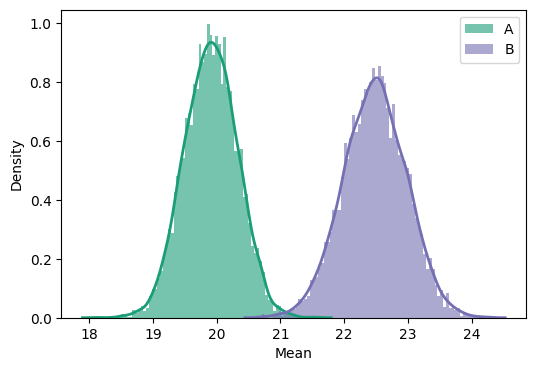

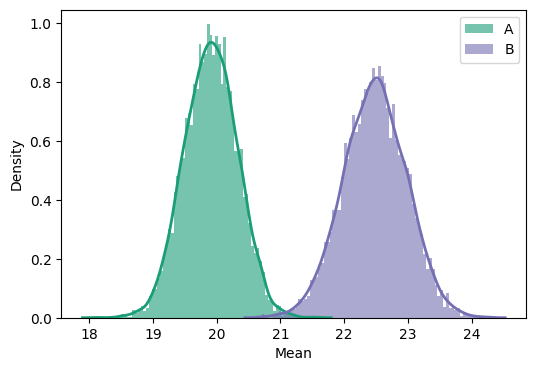

In [20]:
normal.plot_final_posterior(group="AB")

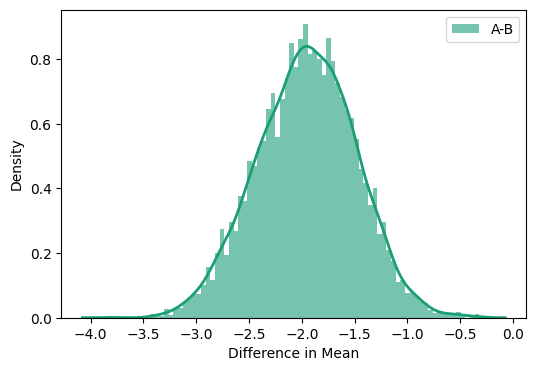

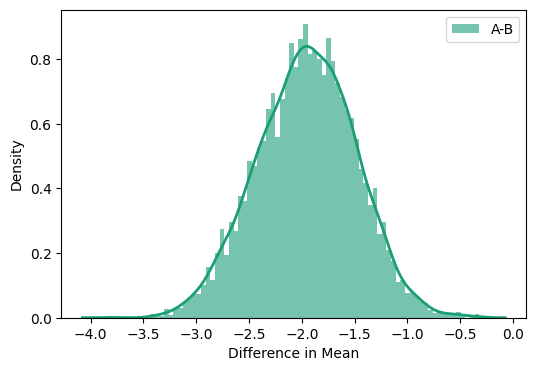

In [21]:
normal.plot_final_posterior(group="diff", post_kwargs={"var":"std"})

Bayesian metrics summary: 

Probablity that A is better than B = 0.00% 

There is 95% that the difference in Mean is between -3.21 and -1.07 

The MAP (maximum a posterior estimate) if -1.95 

Probability that the difference is within the ROPE (region of practical equivalence) is 1.8% 

ROPE-based decision: Group A is better -> Practically Significant  

Bayes factor (A vs B vs null): 

                For the null hypothesis: Parameter between -1.00 and 1.00
                For the alternative hypothesis: Parameter larger than 0 or smaller than 0
                The Bayes factor is 1.02, thus providing anecdotal evidence for the alternative
                




(<Figure size 1000x600 with 1 Axes>, <Figure size 1000x600 with 1 Axes>)

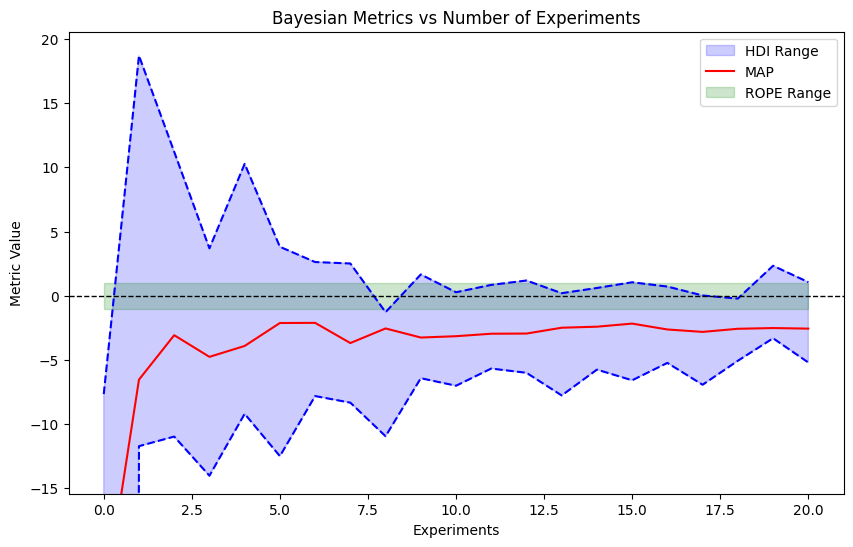

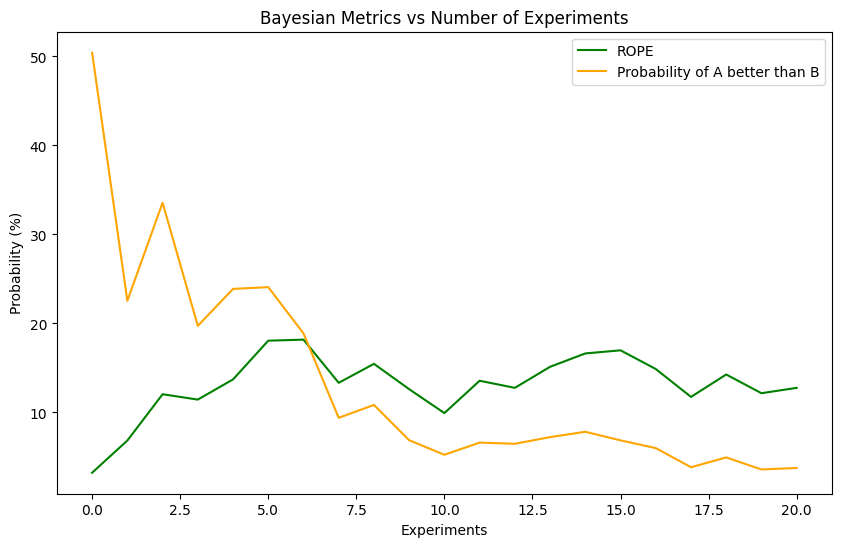

In [22]:
# calculate some Bayesian metrics

ROPE = [-1, 1]  # Region of Practical Equivalence
print(normal.summary_result(rope_interval=ROPE,level=95))

normal.plot_bayesian_metrics(rope_interval=ROPE)

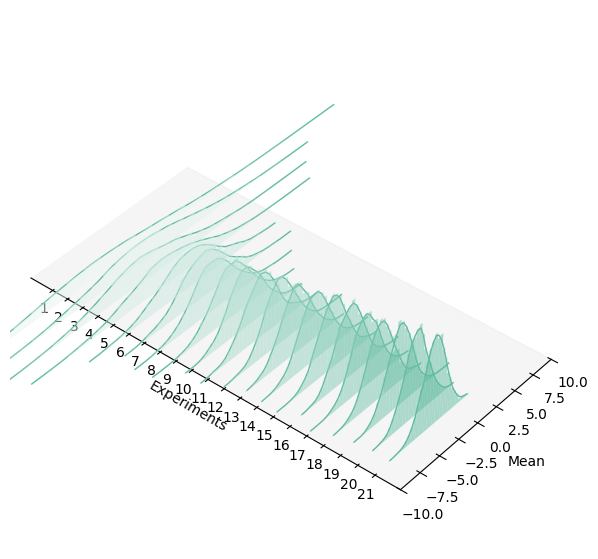

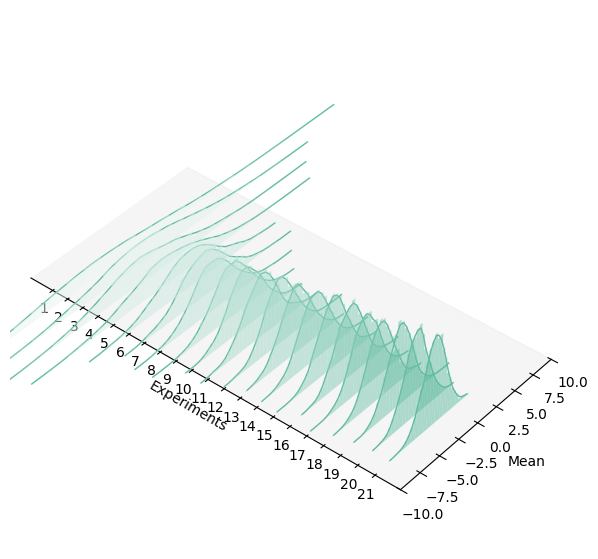

In [23]:
normal.plot_cum_posterior(group="diff", type="3D",  para_range=[-10,10])

In [24]:
# animation
anim = normal.plot_anim(group="diff")
anim

# Multinomial

In [2]:
# generate  random multinomial data

# Create data type = Bernoulli object
Multi_test = multinomial.BaysMultinomial(prior=np.ones(3))

# create data for two groups
p_A = [0.1, 0.2,  0.7]
p_B = [0.2, 0.5, 0.3]
for n in range(20):
    n_trial = np.random.randint(10,50)
    Multi_test.add_rand_experiment(n_trial, p_A, group="A")
    Multi_test.add_rand_experiment(n_trial, p_B, group="B")

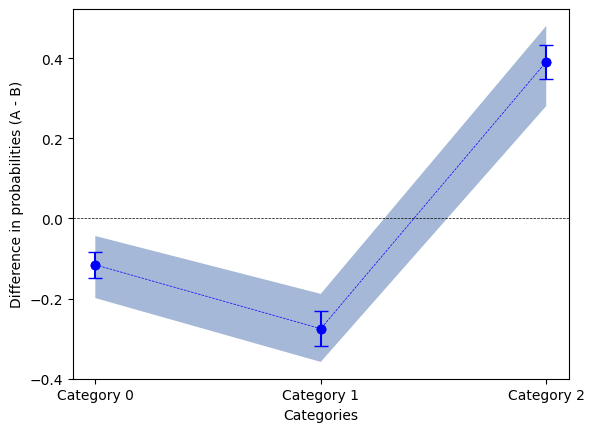

In [3]:
Multi_test.plot_dirichlet_rvs(group="diff")
plt.show()

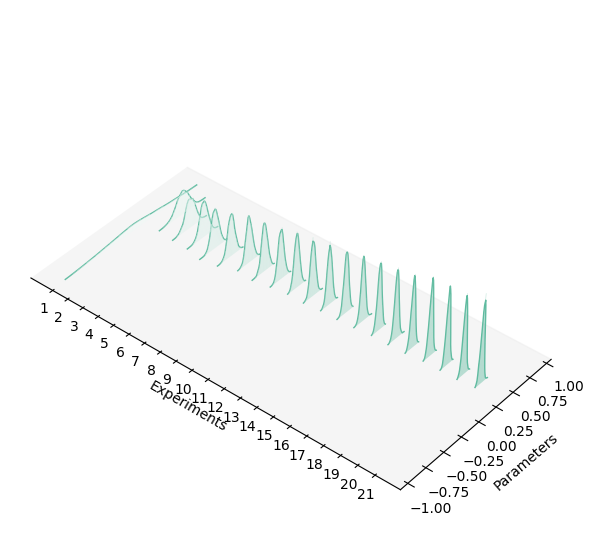

In [4]:
Multi_test.plot_cum_posterior(category_idx=2, group="diff", type="3D")
plt.show()


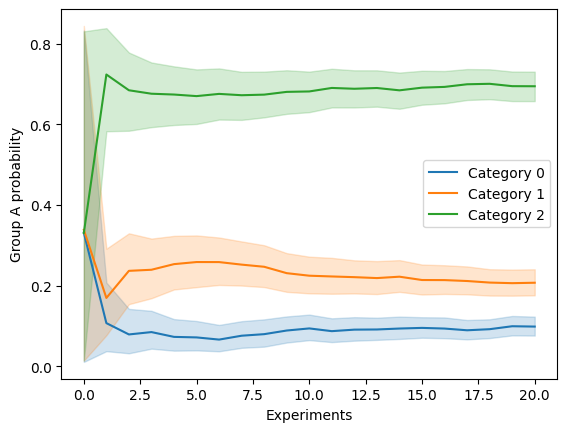

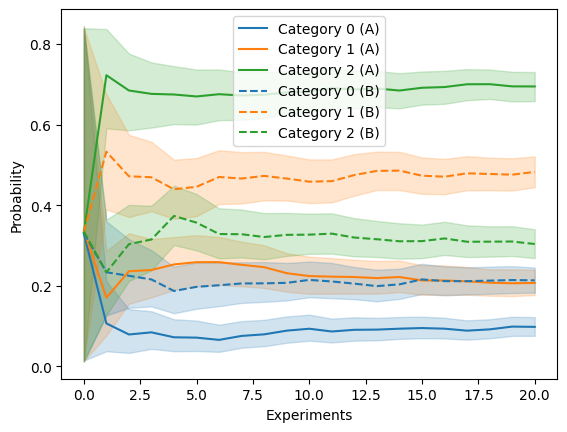

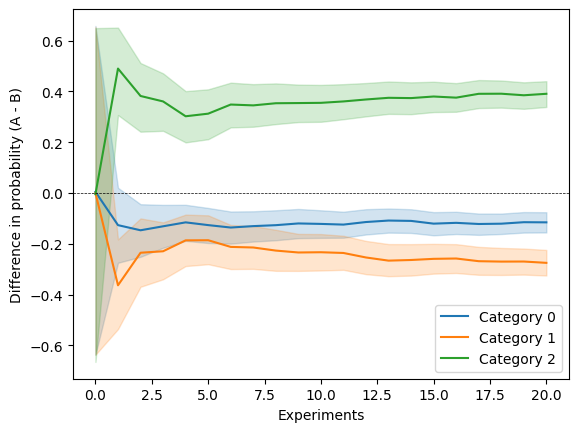

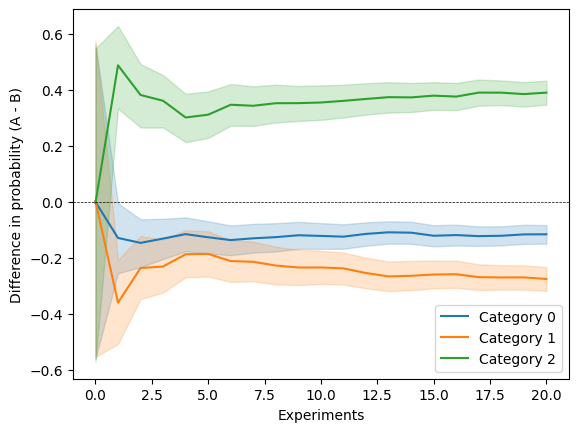

In [6]:
# Single group — ribbons per category
fig = Multi_test.plot_cum_posterior_dirichlet(group="A")
plt.show()

# Both groups — solid (A) vs dashed (B), same colors per category
fig = Multi_test.plot_cum_posterior_dirichlet(group="AB")
plt.show()

# Difference — ribbons around zero showing A-B per category
fig = Multi_test.plot_cum_posterior_dirichlet(group="diff")
plt.show()

# Custom CI level
fig = Multi_test.plot_cum_posterior_dirichlet(group="diff", level=90)
plt.show()
